In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [2]:
#Reading the dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\Evaluation\Churn - Team 5\E Commerce Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
#Dropping 'Unnamed: 0' Column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

In [6]:
df.isnull().sum()

CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

In [7]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,16880,16881,16882,16883,16884,16885,16886,16887,16888,16889
CustomerID,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,55621,55622,55623,55624,55625,55626,55627,55628,55629,55630
Churn,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
Tenure,4.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,-10000.0,NaN,...,3.0,14.0,13.0,5.0,1.0,10.0,13.0,1.0,23.0,8.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone,Computer,Phone,Phone,Phone,Phone,...,Mobile Phone,Mobile Phone,Mobile Phone,Computer,Mobile Phone,Computer,Mobile Phone,Mobile Phone,Computer,Mobile Phone
CityTier,3,1,1,3,1,1,3,1,3,1,...,1,3,3,1,3,1,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0,22.0,11.0,6.0,9.0,31.0,...,35.0,35.0,31.0,12.0,12.0,30.0,13.0,11.0,NaN,15.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC,Debit Card,Cash on Delivery,CC,E wallet,Debit Card,...,Credit Card,E wallet,E wallet,Credit Card,NaN,Credit Card,Credit Card,Debit Card,Credit Card,Credit Card
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,NaN,3.0,2.0,3.0,NaN,2.0,...,4.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0
NumberOfDeviceRegistered,3.0,4.0,4.0,4.0,3.0,5.0,3.0,3.0,4.0,5.0,...,5.0,5.0,5.0,4.0,5.0,2.0,5.0,2.0,NaN,2.0


In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,16890.000000,16890.000000,16107.000000,16890.000000,15555.000000,16125.000000,16290.000000,16890.000000,16890.000000,16890.000000,16095.000000,16122.000000,16116.000000,15969.000000,16890.000000
mean,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.289097,0.374218,1353.431459,0.915335,8.556625,0.721881,1.024065,77841.558859,2.583433,0.451381,3.675257,1.894504,2.939497,3.654204,49.204123
min,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54223.000000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.drop_duplicates(keep='first', inplace = True) #Removing duplicates
df.duplicated().sum()

0

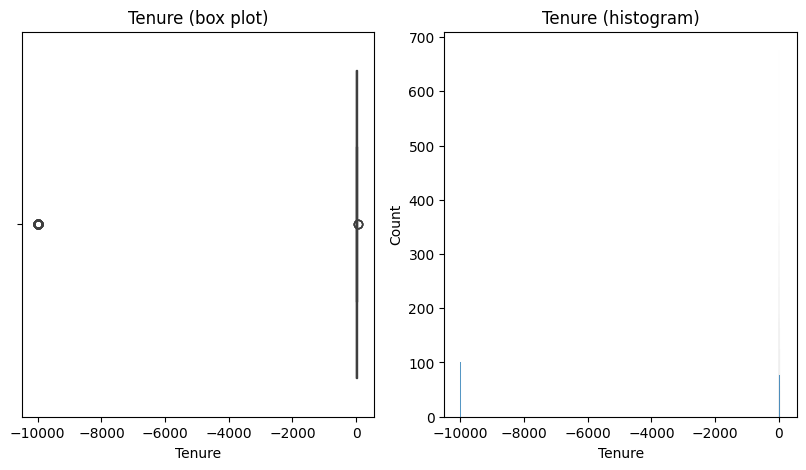

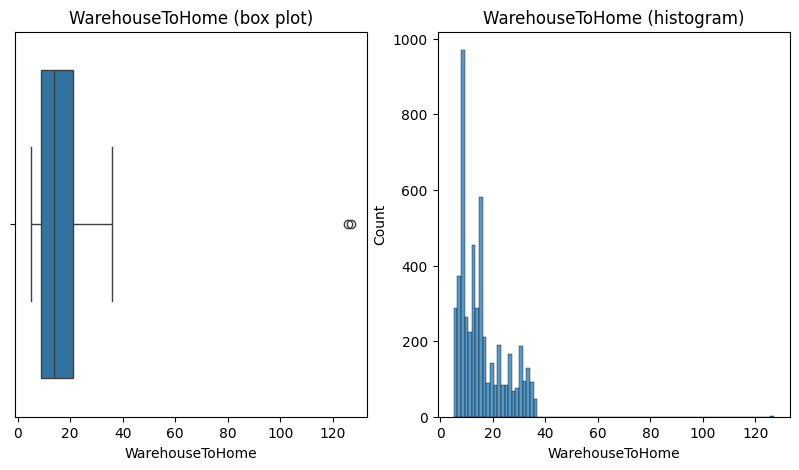

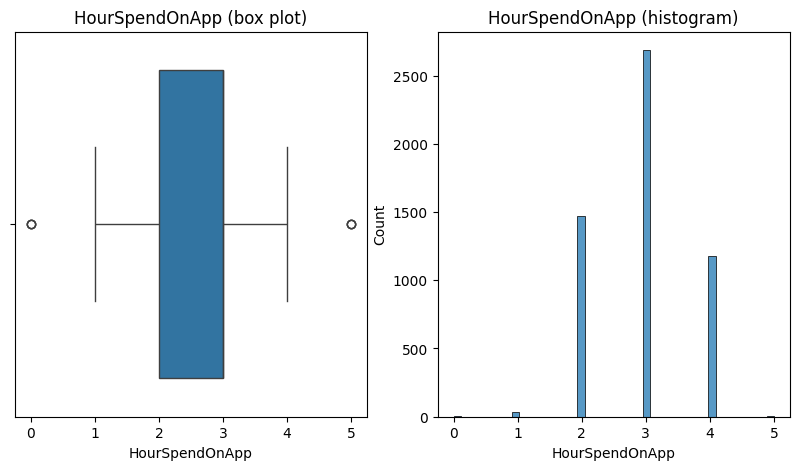

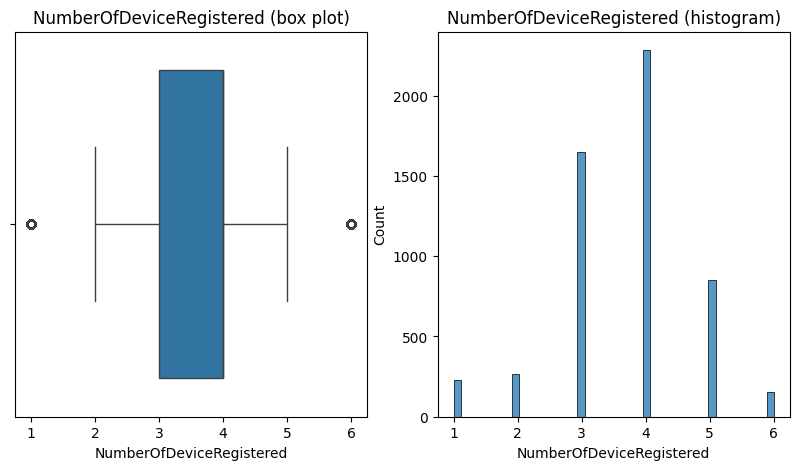

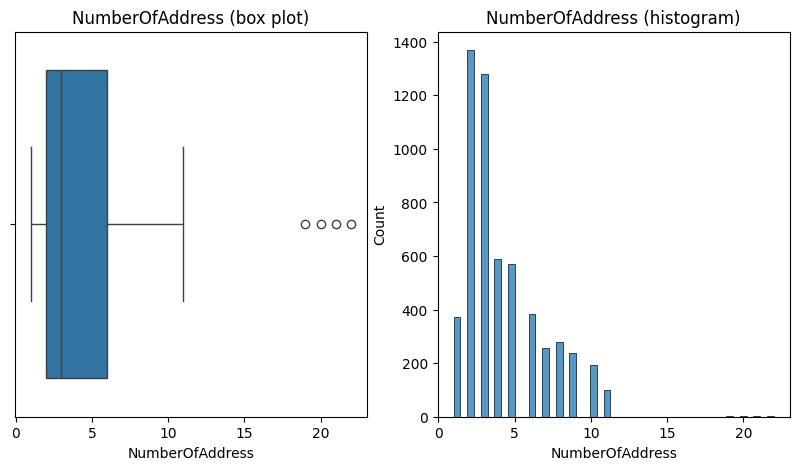

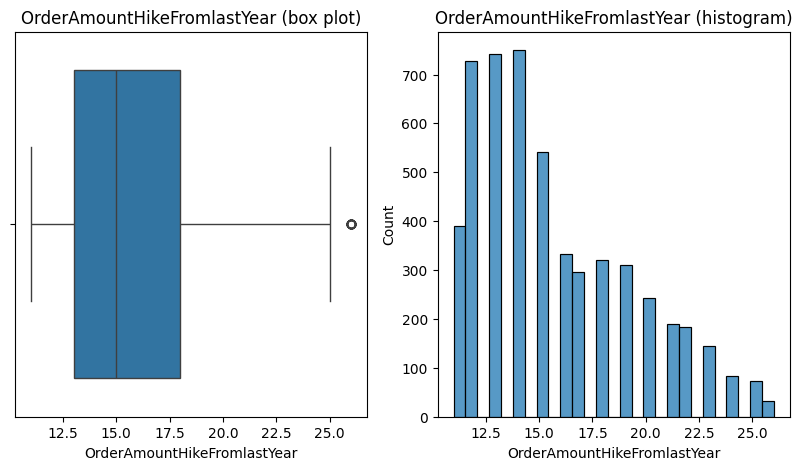

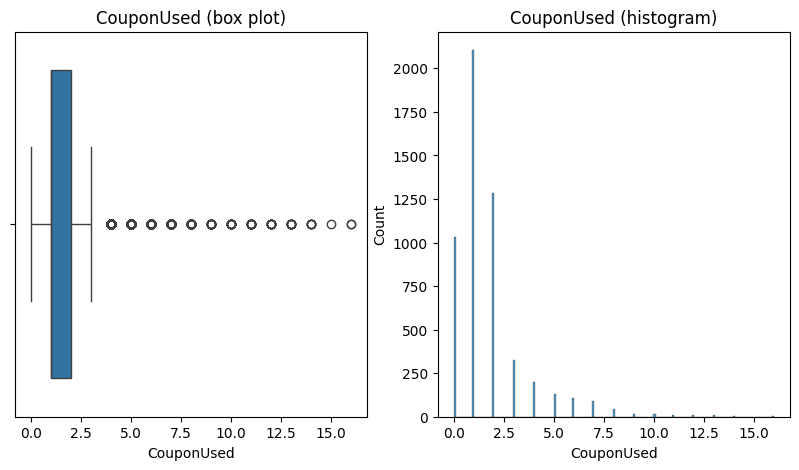

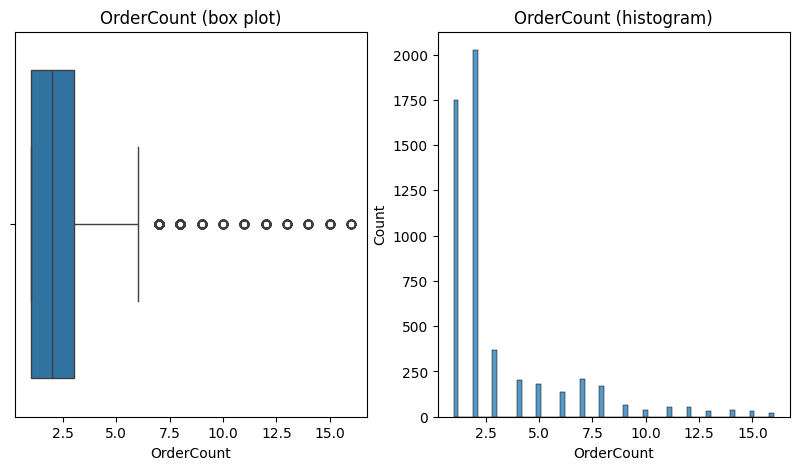

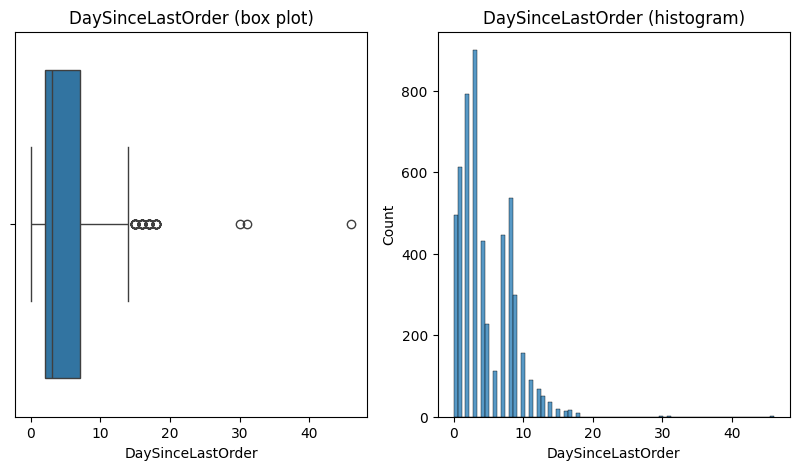

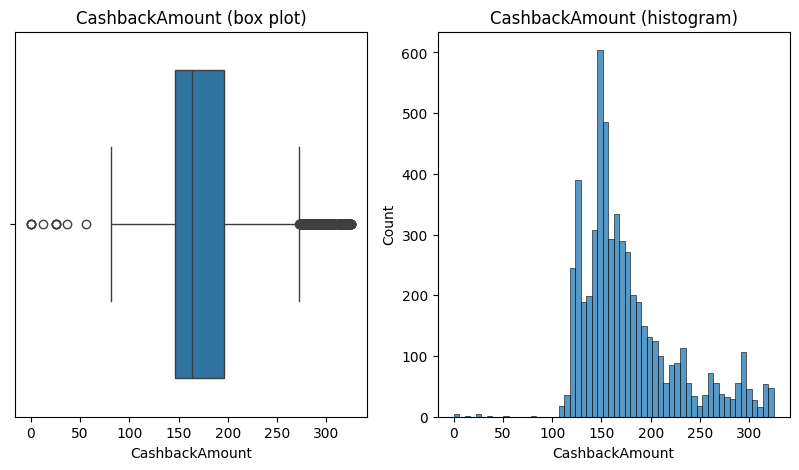

In [10]:
exclude_cols = ['CustomerID', 'Churn','Complain', 'CityTier','SatisfactionScore']

for i in df.columns:
 if (df[i].dtype != 'object') & (i not in exclude_cols):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    
    sns.boxplot(x=df[i], ax=axs[0])
    axs[0].set_title(i + ' (box plot)')
    
    sns.histplot(x=df[i], kde=False, ax=axs[1])
    axs[1].set_title(i + ' (histogram)')
    
    plt.show()

In [11]:
for i in df.columns:
 if(df[i].dtype == 'object'):
    print(df[i].value_counts())
    print('\n')

PreferredLoginDevice
Mobile Phone    2735
Computer        1620
Phone           1225
0                 50
Name: count, dtype: int64


PreferredPaymentMode
Debit Card          2229
Credit Card         1449
E wallet             597
UPI                  392
COD                  356
CC                   263
Cash on Delivery     144
Name: count, dtype: int64


Gender
Male      3187
Female    2143
m          197
f          103
Name: count, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus
Married     2879
Single      1726
Divorced     825
Name: count, dtype: int64




In [12]:
df['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [13]:
df['Gender'] = df['Gender'].replace('m', 'Male').replace('f', 'Female')

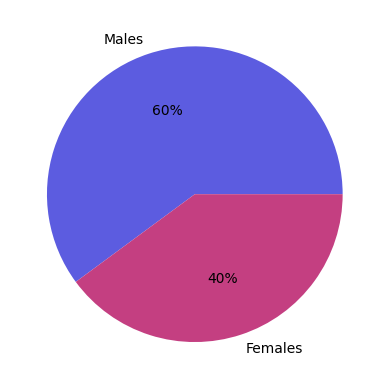

In [14]:
m = (df['Gender'] == 'Male').sum()
f = (df['Gender'] == 'Female').sum()
labels = ['Males', 'Females']
colors = ['#5c5ce0', '#c43f81']
plt.pie([m, f], labels=labels, autopct='%.0f%%', colors=colors)
plt.show()

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

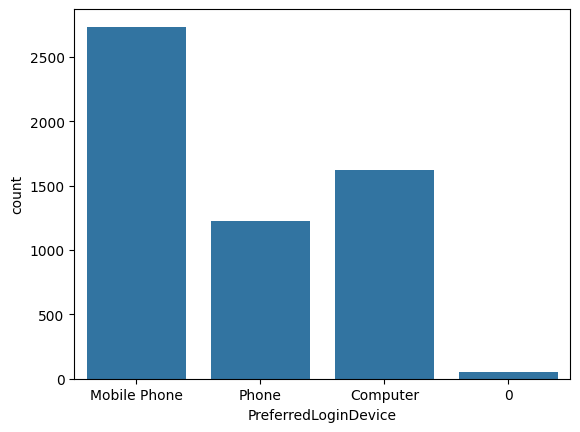

In [15]:
sns.countplot(x=df["PreferredLoginDevice"])

In [16]:
df['PreferredLoginDevice'] = np.where(df['PreferredLoginDevice'] == '0', df['PreferredLoginDevice'].mode() , df['PreferredLoginDevice'])

In [17]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

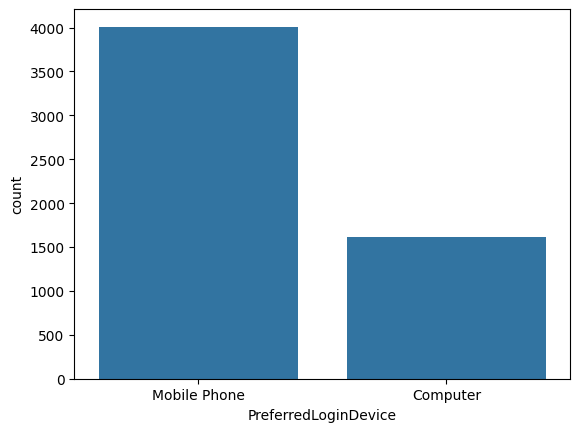

In [18]:
sns.countplot(x=df["PreferredLoginDevice"])

<Axes: xlabel='PreferedOrderCat', ylabel='count'>

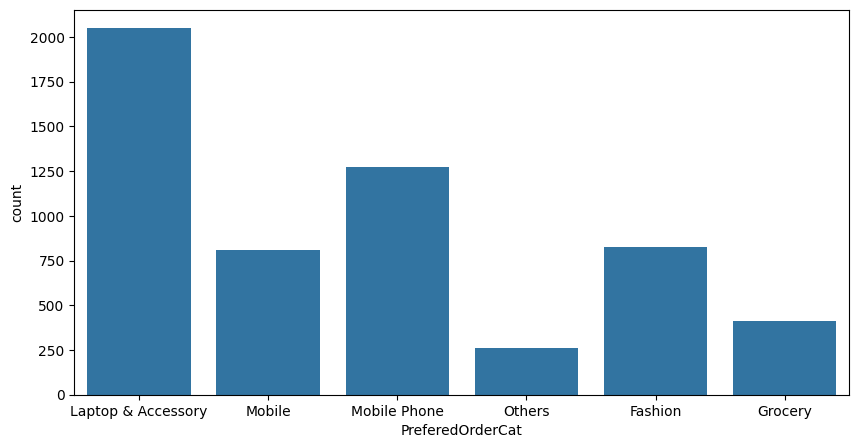

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

In [20]:
df['PreferedOrderCat'] = np.where(df['PreferedOrderCat'] == 'Mobile', 'Mobile Phone' , df['PreferedOrderCat'])

<Axes: xlabel='PreferedOrderCat', ylabel='count'>

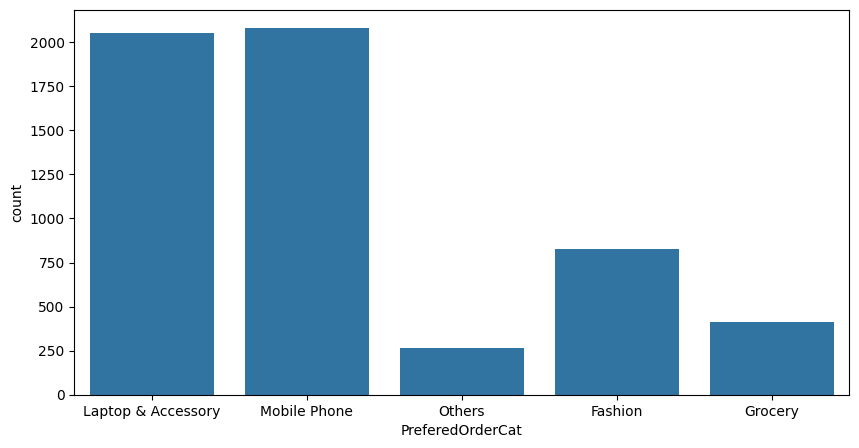

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

In [22]:
df['PreferredPaymentMode'].unique()


array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card', nan], dtype=object)

In [23]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card').replace('COD', 'Cash on Delivery')

<Axes: >

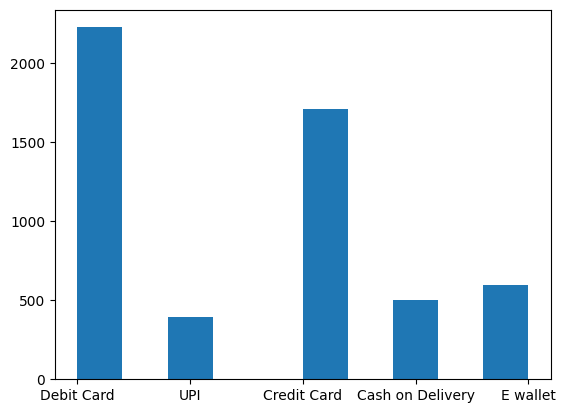

In [24]:
df['PreferredPaymentMode'].hist(grid=False)

In [25]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         261
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                445
PreferredPaymentMode           200
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered       200
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                  200
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [26]:
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Use .loc to replace outliers with NaN
df.loc[(df['Tenure'] < lower_bound) | (df['Tenure'] > upper_bound), 'Tenure'] = np.nan


In [27]:
df['Tenure'].unique()

array([ 4., nan,  0., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
       13.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 31.])

In [28]:
df['SatisfactionScore'].value_counts()

SatisfactionScore
3         1665
1         1140
5         1089
4         1060
2          576
589314     100
Name: count, dtype: int64

In [29]:
#Since Satisfaction Score has a correlation with Churn Column, Let's group the Satisfaction Score of 589314.0 with the churn rate to figure out how to handle the value accurately
Satisfaction_Handling = df[['Churn','SatisfactionScore']]
Satisfaction_Handling = Satisfaction_Handling[Satisfaction_Handling['SatisfactionScore'] == 589314.0]
Grouped = Satisfaction_Handling.groupby('Churn')['SatisfactionScore'].count()
Grouped

Churn
0    75
1    25
Name: SatisfactionScore, dtype: int64

In [30]:
df['SatisfactionScore'].unique()


array([     2,      3, 589314,      5,      4,      1], dtype=int64)

In [31]:
df['SatisfactionScore'].median()

3.0

In [32]:
df['SatisfactionScore'] = np.where(df['SatisfactionScore']==589314, 3, df['SatisfactionScore'])

<Axes: ylabel='SatisfactionScore'>

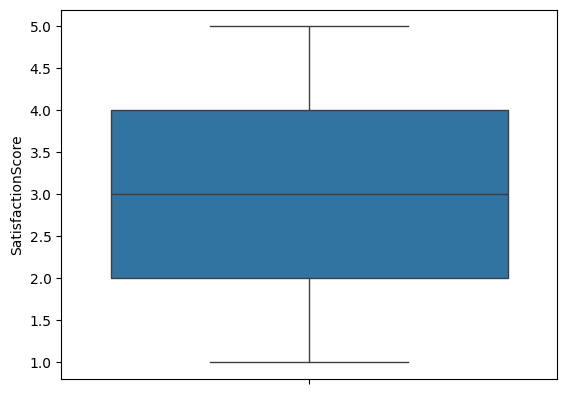

In [33]:
sns.boxplot(df['SatisfactionScore'])

In [34]:
df['DaySinceLastOrder'].value_counts() #Figuring Out if there are extreme values.

DaySinceLastOrder
3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

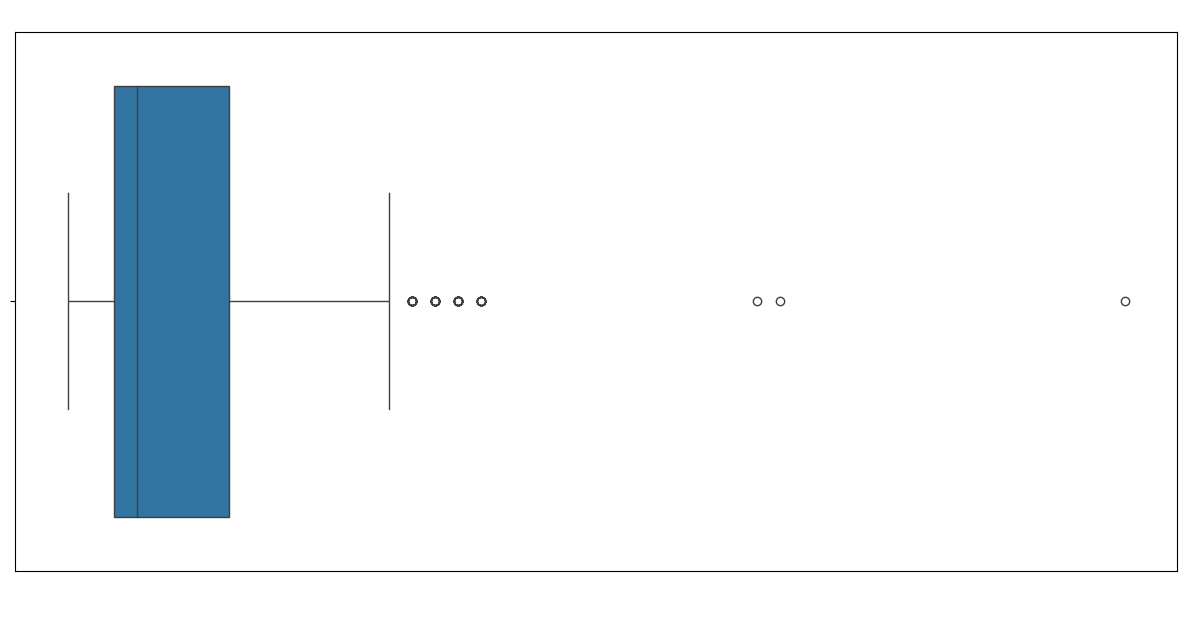

In [35]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = df, x = df['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('DaySinceLastOrder Values', color='white')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'white')
plt.show()

In [36]:
df2 = df.copy()

In [37]:
df2.isnull().count()

CustomerID                     5630
Churn                          5630
Tenure                         5630
PreferredLoginDevice           5630
CityTier                       5630
WarehouseToHome                5630
PreferredPaymentMode           5630
Gender                         5630
HourSpendOnApp                 5630
NumberOfDeviceRegistered       5630
PreferedOrderCat               5630
SatisfactionScore              5630
MaritalStatus                  5630
NumberOfAddress                5630
Complain                       5630
OrderAmountHikeFromlastYear    5630
CouponUsed                     5630
OrderCount                     5630
DaySinceLastOrder              5630
CashbackAmount                 5630
dtype: int64

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

vars_with_missing = ['DaySinceLastOrder', 'OrderCount','CouponUsed','OrderAmountHikeFromlastYear','HourSpendOnApp','Tenure','WarehouseToHome','NumberOfDeviceRegistered']

df_missing = df[vars_with_missing]

# Create an instance of the IterativeImputer class
imputer = IterativeImputer( estimator=knn,random_state=0)
# Fit the imputer to the data
imputer.fit(df_missing)

# Generate imputed values for each missing data point
imputed_data = imputer.transform(df_missing)

# Combine imputed data sets to obtain a single data set with imputed values
df_imputed = pd.concat([df.drop(vars_with_missing, axis=1), pd.DataFrame(imputed_data, columns=vars_with_missing)], axis=1)

df_imputed['PreferredPaymentMode'] = df_imputed['PreferredPaymentMode'].fillna(df_imputed['PreferredPaymentMode'].mode()[0])
df_imputed['MaritalStatus'] = df_imputed['MaritalStatus'].fillna(df_imputed['MaritalStatus'].mode()[0])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [39]:
data = df_imputed.copy()
data.isnull().sum()

CustomerID                     0
Churn                          0
PreferredLoginDevice           0
CityTier                       0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
CashbackAmount                 0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
HourSpendOnApp                 0
Tenure                         0
WarehouseToHome                0
NumberOfDeviceRegistered       0
dtype: int64

In [40]:
new_df = data.copy()
new_df.to_csv('cleaned_data.csv',index=False)

In [41]:
q1 = new_df.copy()
# Calculate the average number of days since the last order for all customers
avg_days_since_last_order = q1['DaySinceLastOrder'].mean()

# Create a new column to segment customers based on the number of days since their last order
customer_count_by_segment = q1['Segment'] = pd.cut(q1['DaySinceLastOrder'], bins=[-1,0,5, 10, 15, 20, 47], labels=['Purchased today','1-5 days', '6-10 days', '10-15 days', '15-20 days', 'More than 20 days'])
    
# Print the average number of days since the last order for all customers
print('The average number of days since the last order for all customers is:', avg_days_since_last_order)
# Print the number of customers in each segment
print('Number of customers in each segment:')
print(q1['Segment'].value_counts().sort_index())
#print(customer_count_by_segment)

The average number of days since the last order for all customers is: 4.5442273534635875
Number of customers in each segment:
Segment
Purchased today       514
1-5 days             3145
6-10 days            1647
10-15 days            278
15-20 days             43
More than 20 days       3
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\3997039083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=q1["Segment"], order=q1["Segment"].value_counts().index, palette="coolwarm")


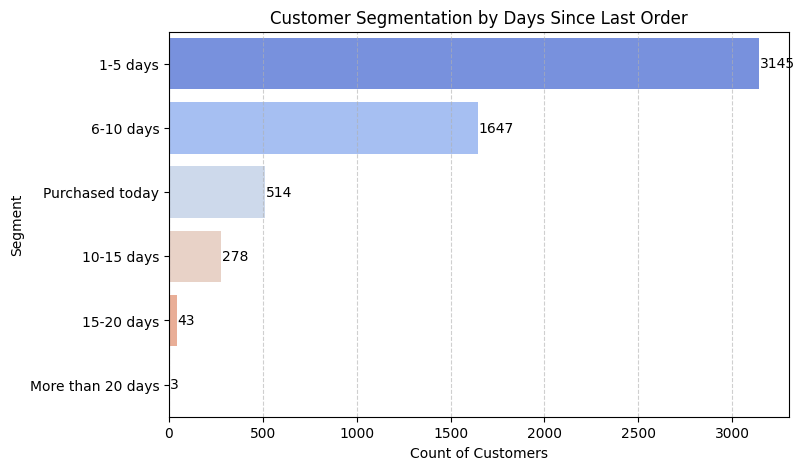

In [42]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(y=q1["Segment"], order=q1["Segment"].value_counts().index, palette="coolwarm")

# Add text labels for each bar
for i, v in enumerate(q1["Segment"].value_counts()):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.xlabel('Count of Customers')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Days Since Last Order')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


In [43]:
q1_risk = q1[q1['DaySinceLastOrder'] >= 15 ]
at_risk_count = q1_risk['DaySinceLastOrder'].count()
print("Count of Customers at risk  = ",at_risk_count)
print("Count of Customers at risk & didn't churn = ",q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 0].count())
print("Count of Customers at risk & churned already  = ",q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 1].count())

Count of Customers at risk  =  65
Count of Customers at risk & didn't churn =  60
Count of Customers at risk & churned already  =  5


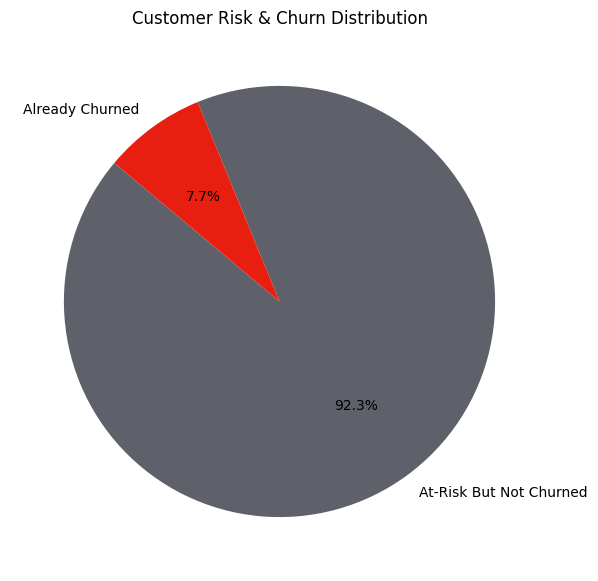

In [60]:
import matplotlib.pyplot as plt

# Define the data
not_churned = q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 0].count()
churned = q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 1].count()

# Labels for the pie chart
labels = ["At-Risk But Not Churned", "Already Churned"]

# Values for the pie chart
values = [not_churned, churned]

# Define color shades (e.g., shades of red)
colors = ['#5e6169', '#e81f10']  # Light red to dark red

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Customer Risk & Churn Distribution")

# Show the pie chart
plt.show()


In [45]:
q1_risk.columns

Index(['CustomerID', 'Churn', 'PreferredLoginDevice', 'CityTier',
       'PreferredPaymentMode', 'Gender', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'CashbackAmount', 'DaySinceLastOrder', 'OrderCount', 'CouponUsed',
       'OrderAmountHikeFromlastYear', 'HourSpendOnApp', 'Tenure',
       'WarehouseToHome', 'NumberOfDeviceRegistered', 'Segment'],
      dtype='object')

In [46]:
q1_risk['Gender'].value_counts() 


Gender
Male      42
Female    23
Name: count, dtype: int64

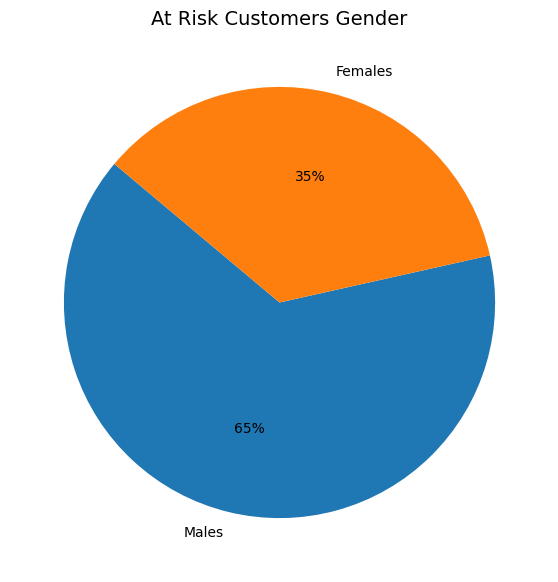

In [47]:
import matplotlib.pyplot as plt

# Define gender-based colors
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Males, Pink for Females

plt.figure(figsize=(7, 7))
plt.title('At Risk Customers Gender', size=14)

# Create the pie chart with proper gender colors
plt.pie(
    (q1_risk['Gender'].value_counts() / at_risk_count * 100),
    labels=['Males', 'Females'],
    autopct='%.0f%%',
    colors=colors,  # Assign colors
    startangle=140
)

plt.show()


In [48]:
q1_risk['CityTier'].value_counts()

CityTier
1    49
3    16
Name: count, dtype: int64

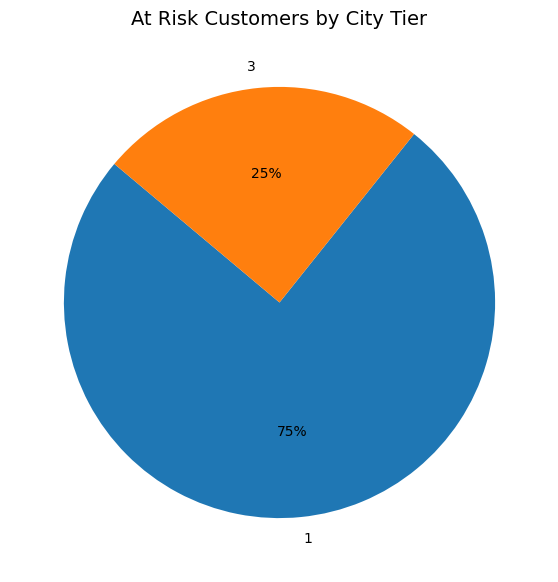

In [49]:
import matplotlib.pyplot as plt

# Define the data
city_tier_counts = q1_risk['CityTier'].value_counts()
labels = city_tier_counts.index
values = city_tier_counts.values

# Define representative colors for City Tiers
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Tier 1, Orange for Tier 3

plt.figure(figsize=(7, 7))
plt.title('At Risk Customers by City Tier', size=14)

# Create the pie chart
plt.pie(
    values, labels=labels, autopct='%.0f%%',
    colors=colors, startangle=140
)

plt.show()


In [50]:
q1_risk['PreferedOrderCat'].value_counts()

PreferedOrderCat
Grocery               20
Others                14
Mobile Phone          12
Fashion               11
Laptop & Accessory     8
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\2038225102.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


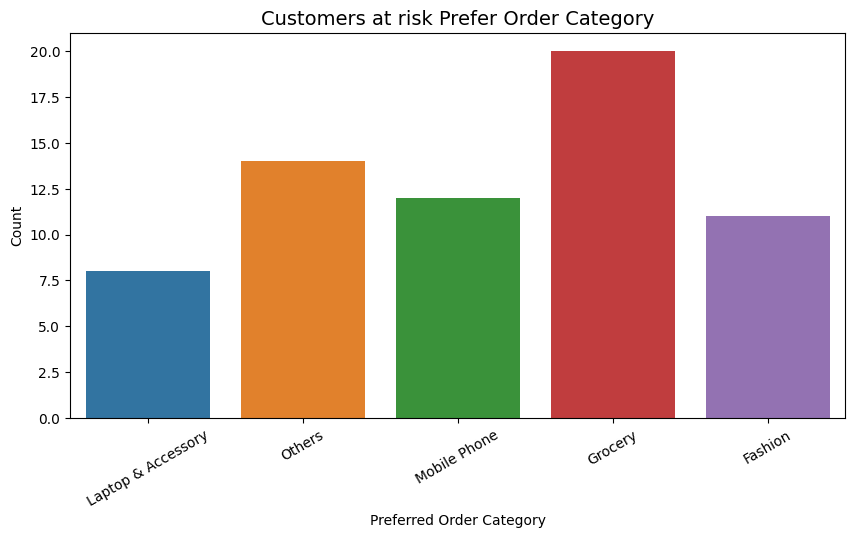

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each category
category_colors = {
    "Laptop & Accessory": "#1f77b4",  # Blue
    "Others": "#ff7f0e",              # Orange
    "Mobile Phone": "#2ca02c",        # Green
    "Grocery": "#d62728",             # Red
    "Fashion": "#9467bd"              # Purple
}

plt.figure(figsize=(10, 5))
plt.title('Customers at risk Prefer Order Category', size=14)

# Plot the countplot with assigned colors
sns.countplot(
    data=q1_risk, x='PreferedOrderCat',
    palette=category_colors
)

plt.xlabel("Preferred Order Category")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate x-axis labels for better visibility
plt.show()


In [52]:
q1_risk['MaritalStatus'].value_counts()

MaritalStatus
Married     36
Single      19
Divorced    10
Name: count, dtype: int64

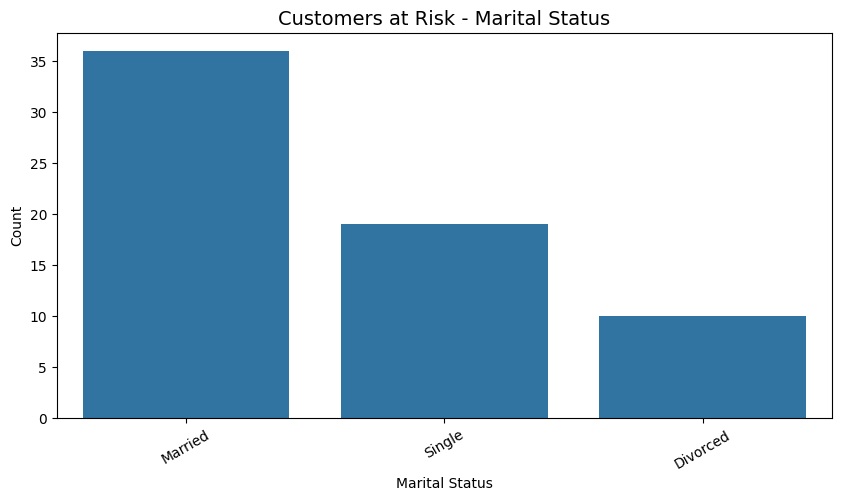

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# New color choices for each marital status

plt.figure(figsize=(10, 5))
plt.title('Customers at Risk - Marital Status', size=14)

# Plot with updated colors
sns.countplot(
    data=q1_risk, x='MaritalStatus'
)

plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.show()


In [54]:
q1_risk['Complain'].value_counts()

Complain
0    54
1    11
Name: count, dtype: int64

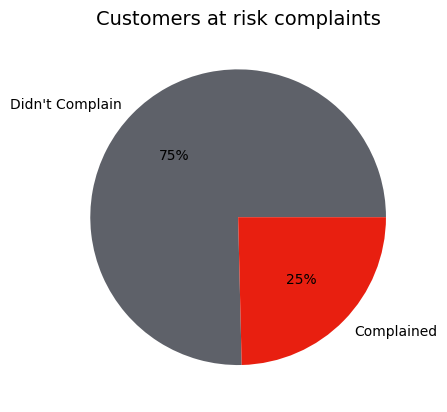

In [58]:
import matplotlib.pyplot as plt

# Define colors
colors = ['#5e6169', '#e81f10']  # Green for Didn't Complain, Red for Complained

# Plot pie chart
plt.title('Customers at risk complaints', size=14)
plt.pie((q1_risk['CityTier'].value_counts() / at_risk_count * 100), 
        labels=['Didn\'t Complain', 'Complained'], 
        autopct='%.0f%%', colors=colors)
plt.show()


In [56]:
q1_risk['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    59
Computer         6
Name: count, dtype: int64

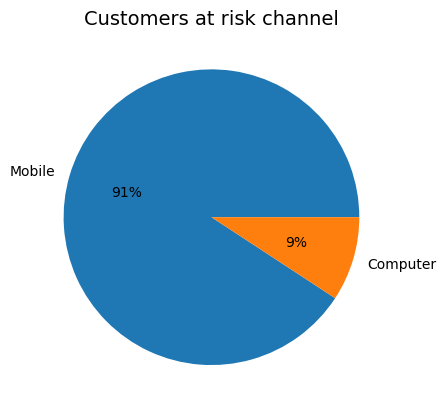

In [57]:
plt.title('Customers at risk channel', size = 14)
plt.pie((q1_risk['PreferredLoginDevice'].value_counts() / at_risk_count *100),labels = ['Mobile','Computer'], autopct='%.0f%%')
plt.show()